In [1]:
source("../utils.R")
options(repr.plot.width = 10, repr.plot.height = 10)

# Fondations

<div class="subtitle1" id="coursename">
Techniques avancées en programmation statistique <strong>R</strong>
</div>
<div class="subtitle2" id="author">
Patrick Fournier<br>
Automne 2021<br>
Université du Québec À Montréal<br>
</div>

## Cours 1: Fondations
1. Structures de données
    1. Tableaux
    2. Listes
2. Fonctions

## Structures de données
<div class="subtitle1">
À l'ordre!
</div>

* $ := $ Manière d'organiser les données en vue de leur *traitement algorithmique*
    + Ex. Annuaire téléphonique, ensemble ordonné $ \Rightarrow $ recherche dichotomique
* Structure de données *linéaire* $ := $ éléments forment une suite
* Les plus employées en R
* Inclut:
    + Tableaux ("vecteurs", matrices, arrays)
    + Listes (lists, data.frame)

### Exemple
Doubler une matrice (entrée par entrée)

In [2]:
m <- n <- 1e3L
mat <- matrix(42L, m, n)

double1 <- function() {
    for (i in seq_len(m))
        for (j in seq_len(n))
            mat[i, j] <- mat[i, j] + mat[i, j]
}

double2 <- function() {
    for (j in seq_len(n))
        for (i in seq_len(m))
            mat[i, j] <- mat[i, j] + mat[i, j]
}

In [3]:
library(microbenchmark)

bench <- microbenchmark(double1(), double2(), 2 * mat)

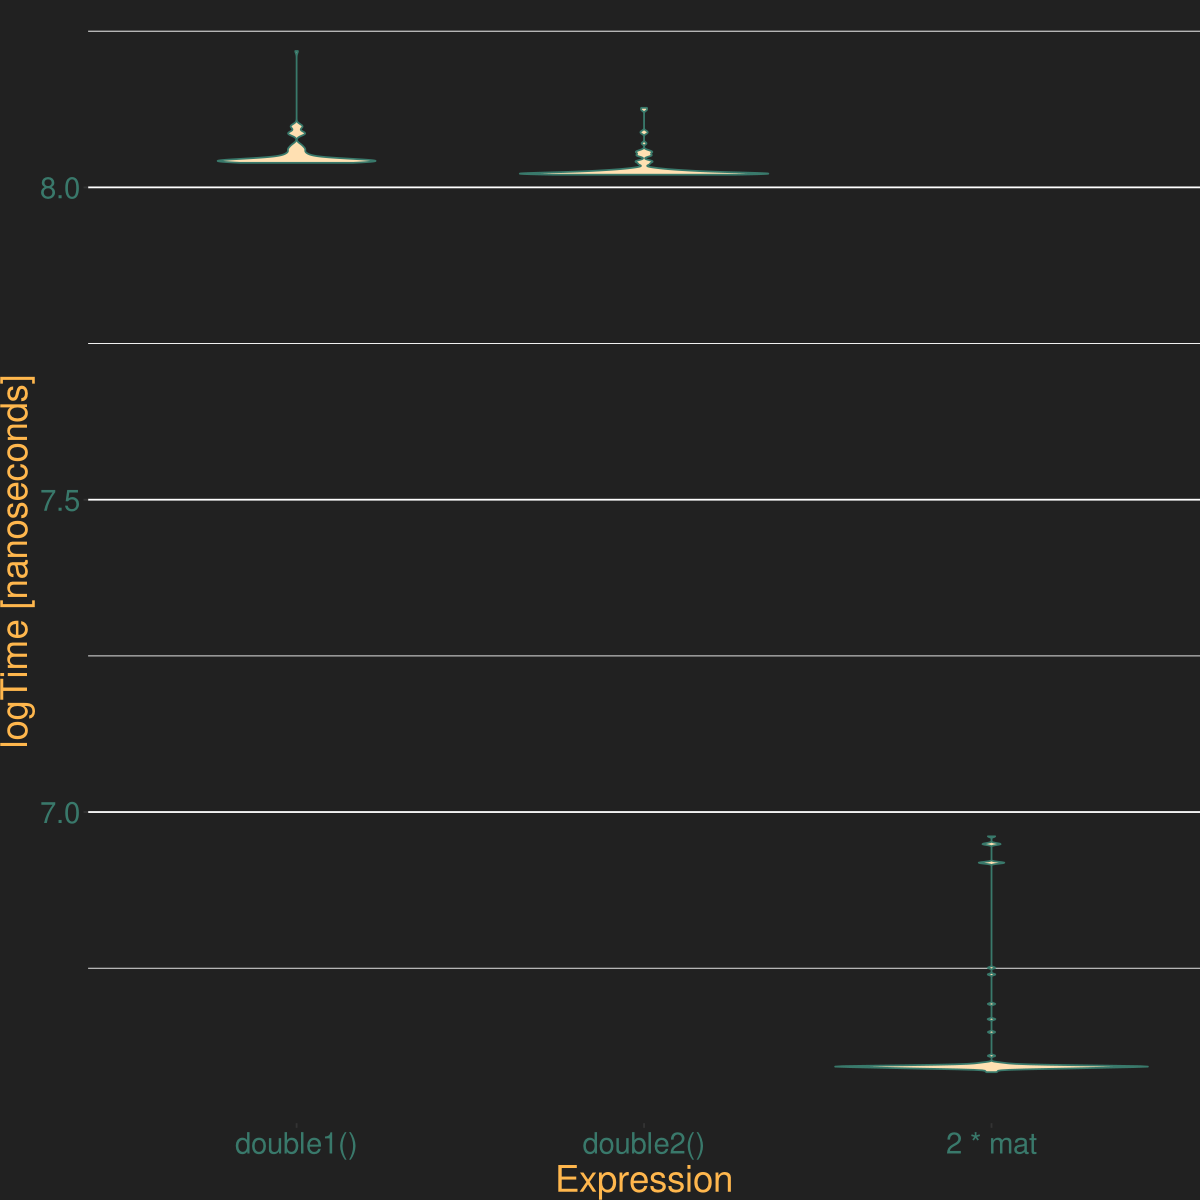

In [4]:
autoplot(bench)

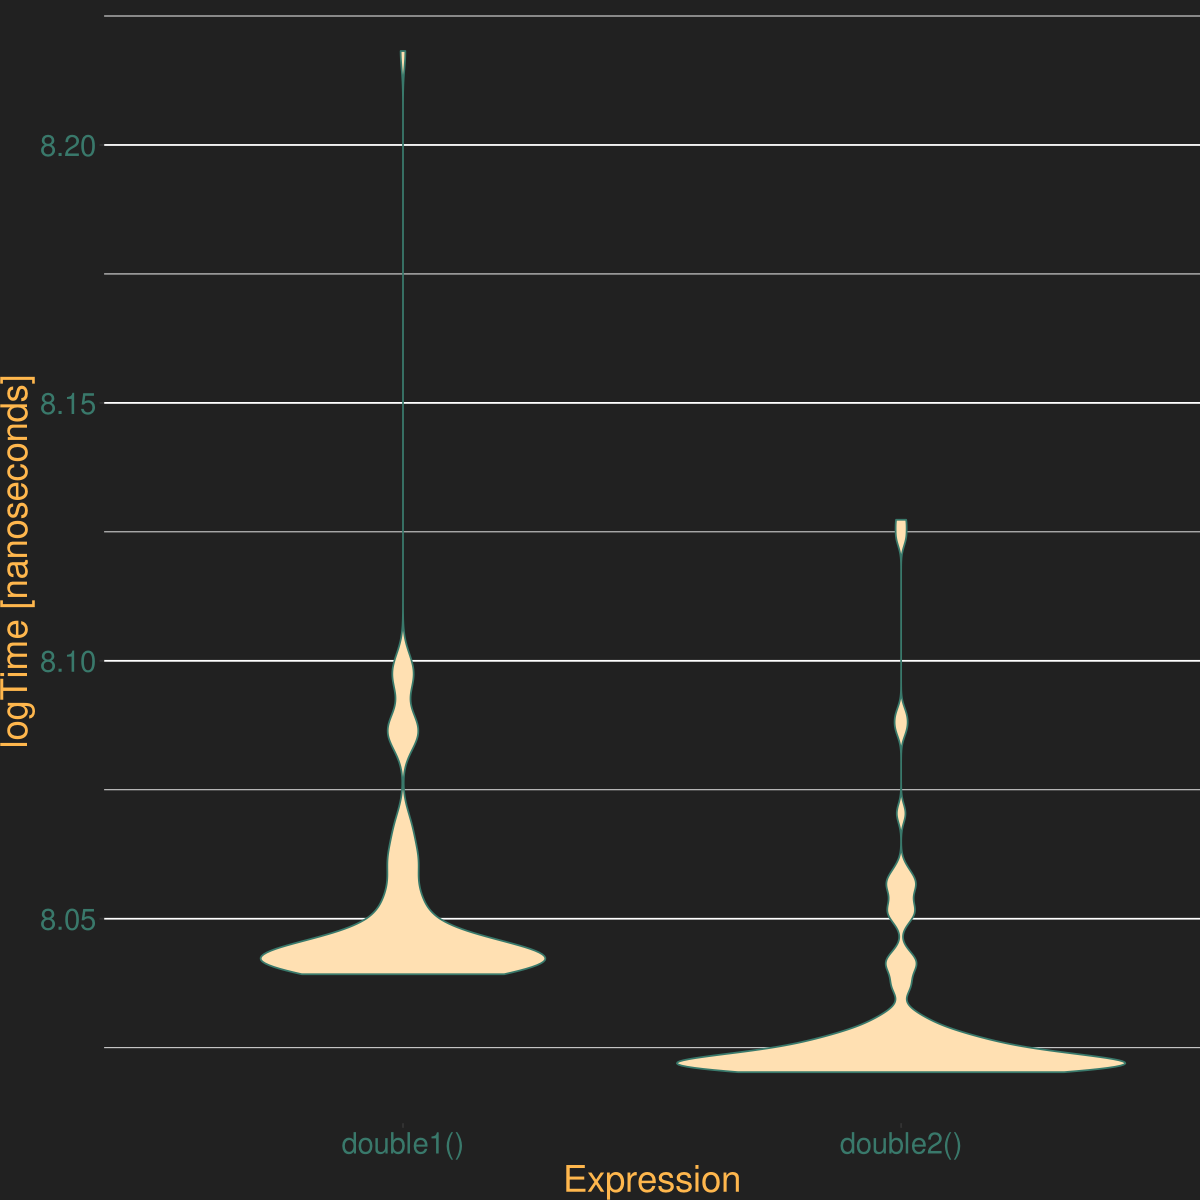

In [5]:
autoplot(subset(bench, expr != "2 * mat"))

### Mémoire informatique
* *Linéaire*: très grand vecteur à éléments dans $ \{ 0, 1 \}^{64} = \mathbb H_{64} $
* *Accès aléatoire (RAM)*: toute entrée est accessible au processeur à n'importe quel moment
* *Localité de la référence*: plus rapide d'accéder à de l'information stockée
  près de celle à laquelle on vient d'accéder
    + Aka principe de localité
    + Vient de la manière selon laquelle sont construits les processeurs 🤷
* Implémentation efficace d'une structure de donnée $ \Rightarrow $ exploite le
  principe de localité

### Algèbre & stockage linéaire

* Scalaire: 👶
* Vecteur: 👶 et on stocke sa dimension (1 entier)
* Matrice: il faut la *vectoriser* et stocker ses dimensions (2 entiers)
* Tenseur: même idée...

Relativement simple, mais
* Vectorisation $ \Rightarrow $ choix: dans quel ordre stocker les entrées?
    + Par rangées: *row-major order*
    + Par colonnes: *column-major order*

**R**: column-major order.

### Algèbre dans **R**
<div class="subtitle1">
Scalaires et vecteurs
</div>

* Pas de distinction! Scalaire $ \Leftrightarrow $ vecteur de dimension 1
* Pas de classe "vecteur" à proprement parler!
    + Classe d'un "vecteur" dépend de son contenu

Pour les valeurs numériques:
* `numeric` qui comprend
    + `integer` $( \mathbb Z )$
    + `double` $( \mathbb R \setminus \mathbb Z )$
* `complex` ($ \mathbb C \setminus \mathbb R $)

Le reste:
* `logical` ($ \{ 0, 1 \} $ représentés par `FALSE` et `TRUE` respectivement)
* `character` (`"chaînes de caractère"`)
* `raw` (données binaires 🤓)

[Détails](https://adv-r.hadley.nz/vectors-chap.html#atomic-vectors)

In [6]:
vec_integer <- c(1L, 2L, 3L)
vec_double <- c(1.0, 2.0, 3.0)
vec_complexe <- c(1 + 2i, 3 + 4i, 5 + 6i)

In [7]:
is.integer(vec_integer)
is.double(vec_double)
is.complex(vec_complexe)

[1] TRUE

[1] TRUE

[1] TRUE

In [8]:
is.numeric(vec_integer)
is.numeric(vec_double)
is.numeric(vec_complexe)

[1] TRUE

[1] TRUE

[1] FALSE

In [9]:
## Attention!
vec_integer
vec_double
identical(vec_integer, vec_double)

[1] 1 2 3

[1] 1 2 3

[1] FALSE

In [10]:
vec_logical <- c(TRUE, FALSE, TRUE)
vec_character <- c("J'αiμε", "beaucoup", "R", "!!!")
vec_raw <- as.raw(c(1, 13, 66, 0x42))

vec_logical
vec_character
vec_raw

[1]  TRUE FALSE  TRUE

[1] "J'αiμε"   "beaucoup" "R"        "!!!"

[1] 01 0d 42 42

In [11]:
is.logical(vec_logical)
is.character(vec_character)
is.raw(vec_raw)

[1] TRUE

[1] TRUE

[1] TRUE

### Algèbre dans **R**
<div class="subtitle1">
Matrices et tenseurs
</div>

* Sont tous deux de classe `array`
    + Les matrices sont en plus de classe `matrix`
* Construits à partir de vecteurs.
    + Éléments peuvent être des mêmes types que les pour les vecteurs
    + En fait, simplement des vecteurs avec un attribut `dim`

In [12]:
mat <- matrix(c(1, 2, 666, 42), nrow = 2, ncol = 2)
class(mat)
mat


[1] "matrix" "array"

1,666
2,42


In [13]:
arr <- array(1:2^4, dim = c(2, 2, 4))
class(arr)

[1] "array"

In [14]:
vec <- 1:16
class(vec)
vec

[1] "integer"

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16

In [15]:
dim(vec) <- c(4, 4)
class(vec)
vec

[1] "matrix" "array"

1,5,9,13
2,6,10,14
3,7,11,15
4,8,12,16


In [16]:
dim(vec) <- c(2, 2, 4)
class(vec)

[1] "array"

### Algèbre dans **R**
<div class="subtitle1">
Opérations utiles
</div>

* Transposition: `t()`
* Somme, différence: `+`, `-`
* Produit
    + Hadamard: `*`
    + matriciel: `%*%`
    + Kronecker: `%x%`
* Déterminant: `det()`
* Valeurs & vecteurs propres: `eigen()`
* Inversion: `solve()`
* Décomposition:
    + Cholesky: `chol()`
    + QR: `qr()`
    + SVD: `svd()`

### Algèbre dans **R**
<div class="subtitle1">
Opérations utiles
</div>

Pour deux matrice $ X $ et $ Y $:
* Préférez `crossprod(X,Y)` à `t(X) %*% Y`
* Préférez `tcrossprod(X,Y)` à `X %*% t(Y)`
* Évitez d'utiliser `solve()`

In [17]:
X <- cbind(1, as.matrix(cars))
head(X)

,speed,dist
1,4,2
1,4,10
1,7,4
1,7,22
1,8,16
1,9,10


In [18]:
head(t(X))

,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
speed,4,4,7,7,8,9,10,10,10,11,⋯,20,20,20,22,23,24,24,24,24,25
dist,2,10,4,22,16,10,18,26,34,17,⋯,52,56,64,66,54,70,92,93,120,85


In [19]:
tXX <- crossprod(X)
all.equal(t(X) %*% X, tXX)

[1] TRUE

In [20]:
eigen(tXX)

eigen() decomposition
$values
[1] 1.369172e+05 1.259337e+03 4.510467e+00

$vectors
            [,1]        [,2]         [,3]
[1,] -0.01666157 -0.07721508  0.996875229
[2,] -0.29712643 -0.95159148 -0.078673646
[3,] -0.95469277  0.29750880  0.007087631


In [21]:
chol(tXX)

,,speed,dist
,7.071068,108.89444,303.9145
speed,0.000000,37.01351,145.5523
dist,0.000000,0.00000,106.5529


### Listes
* Tableaux: super mais *homogènes*
* Listes: *hétérogènes*
    + En fait, vecteur (homogène) de références 🤓
* Data frame = liste 😱

In [22]:
liste_hetero <- list(42, "αβγ", TRUE, list(list(matrix(666, 2, 2))))
liste_hetero

666,666
666,666


In [23]:
df <- data.frame(var1 = rnorm(5), var2 = letters[1:5], var3 = sample(42:46))
df

var1,var2,var3
<dbl>,<chr>,<int>
0.3171707,a,44
0.2109468,b,45
-0.6182637,c,43
-0.0241803,d,42
1.2252052,e,46


In [24]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [25]:
is.list(iris)

[1] TRUE

### Sélection

* Comme pour les autres vecteurs: `[]`
    + Retourne une *liste*
* Pour sélectionner un seul élément: `[[]]`

In [26]:
class(liste_hetero[2])
liste_hetero[2]

[1] "list"

[[1]]
[1] "αβγ"

In [27]:
class(liste_hetero[[2]])
liste_hetero[[2]]

[1] "character"

[1] "αβγ"

### Sélection

* Possible de nommer les éléments d'une liste
    + On peut alors sélectionner par les noms
    + Raccourci: `maliste$nom` $ \Leftrightarrow $ `maliste[["nom"]]` 

In [28]:
names(iris)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

In [29]:
head(iris[["Species"]])

[1] setosa setosa setosa setosa setosa setosa
Levels: setosa versicolor virginica

## Fonctions

* Suite d'instructions réalisant une certaine tâche.
* Peut prendre des *arguments* (comme en maths 🧮)
* Peut retourner un résultat (pas comme en maths 💻)
* Peut modifier des variables externes $ \Rightarrow$ *effets de bord*
    + Pure 🧮 (ex. `c`, `matrix`)
    + Impure 💻 (ex. `plot`, `dim`)
* syntaxe **R**: `function()` et `\()` ($ \geq 4.1.0 $ seulement)

In [30]:
print_yo <- function() print("Yo!")
print_yo()

[1] "Yo!"


In [31]:
is_odd <- function(x) x %% 2 > 0
is_odd(42)

[1] FALSE

### Fonctions anonymes
* Aucune obligation d'associer une fonction à un symbole $ \Rightarrow $ *fonction anonyme* 🥸
    + Autres terminologies: λ-function ou tout simplement λ
* Syntaxe **R**: La même! `function(x) 2 * x`
    + Depuis 4.1.0, syntaxe équivalante: `\(x) 2 * x`

In [32]:
(function(x) 2 * x)(21)

[1] 42

In [33]:
(\(x) x / 2)(84)

[1] 42

### Fonctions d'ordre supérieur

* Au moins un des arguments est une fonction
    + Ex. `lapply`, `Filter`
* Retourne une fonction
    + Ex. `Negate`, `compose`([purrr](purrr.tidyverse.org))
* Fonctions anonymes 🙏 fonctions d'ordre supérieur

In [34]:
is_even <- Negate(is_odd)
is_even(42)

[1] TRUE

In [35]:
Filter(is_even, 1:10)

[1]  2  4  6  8 10

In [36]:
lapply(1:10, \(x) 2 * x + 1)

[[1]]
[1] 3

[[2]]
[1] 5

[[3]]
[1] 7

[[4]]
[1] 9

[[5]]
[1] 11

[[6]]
[1] 13

[[7]]
[1] 15

[[8]]
[1] 17

[[9]]
[1] 19

[[10]]
[1] 21

### Arguments par défaut
* Normalement, chaque argument d'une fonction doit être fourni
* Possible de spécifier des arguments par défaut
    + L'utilisateur peut fournir ou pas un tel argument

In [37]:
rand_exp <- function(n, θ = 1.0) -θ * log(runif(n))

mean(rand_exp(1e4L))
mean(rand_exp(1e4L, 10))

[1] 0.992755

[1] 9.965264

### Fonctions variadiques
* Une fonction peut prendre un nombre variable d'arguments
* Argument spécial: `...`
* `...` peut être
    + Passé à une autre fonction variadique
    + Transformé en liste

In [38]:
mysum <- function(..., noise = FALSE) {
    dat <- as.numeric(list(...))
    
    if (noise)
        dat <- dat + rbeta(length(dat), 0.5, 0.5)
    
    sum(dat)
}

mysum(1, 2, 3, 4, 5)
mysum(1, 2, 3, 4, 5, noise = TRUE)

[1] 15

[1] 16.69155

### Fonctions: `return`

* Par défaut, la dernière valeur évaluée est retournée par la fonction.
* Comportement modifiable par le mot clé `return`
    + `return` n'es pas obligatoire


In [39]:
prod_not_42 <- function(x){
    if (42 %in% x)
        return(0)
    
    prod(x)
}

In [40]:
prod_not_42(1:10)

[1] 3628800

In [41]:
prod_not_42(1:100)

[1] 0

### Fonctions récursives

* Permises en **R**
* Toutefois, ne sont pas optimisées
* Facile de dépasser la taille du stack

In [42]:
fact <- function(x) {
    identical(x, 1.0) && return(x)
    
    x * fact(x - 1.0)
}

In [43]:
fact(6)

[1] 720

In [44]:
## Sur ma machine, stack overflow pour x > 696.
fact(100.0)

[1] 9.332622e+157

### Pipe 🚬

* Depuis **R** 4.1.0, nouvel opérateur: `|>`
* `x |> f(y, z)` $ \Leftrightarrow $ `f(x, y, z)`
* Utile pour chaîner des opérations

In [45]:
1:100 |>
    Filter(f = \(x) identical(x %% 3L, 0L) | identical(x %% 5L, 0L)) |>
    sqrt() |>
    sum()

[1] 319.4625